# Apricot

Python programski paket Apricot pruža funkcionalnost da se iz skupa podataka izdvoji njegov reprezentativni podskup, koristeći submodularnu optimizaciju.
Primena je mnogostruka: na primer, za vizualizaciju i razumevanje podataka, kao i za generisanje manjeg skupa podataka za treniranje modela u mašinskom učenju (kada  zbog veličine skupa podataka nije moguće trenirati model u realnom vremenu, ili je to skupo).

## Submodularne funkcije

Submodularne funkcije nad skupovima su oblika $f: 2^V \to R$. $2^V$ predstavlja sve funkcije koje preslikavaju skup $V$ u skup $2$ (koji je {0,1}). Ove funkcije nad skupom elemenata određuju realnu vrednost iz $R$ koja predstavalja meru kvaliteta tog skupa. Dodatno, submodularne funkcije imaju svojstvo *iščezavanja* ili *umanjenja* (eng. *diminishing returns property*), koje glasi:

$f(X \cup v) - f(X) \geq f(Y \cup v) - f(Y)$ gde su  $X,Y \subseteq V , X \subseteq Y, \forall v \in V \setminus Y$

Drugim rečima, svojstvo *iščezavanja* znači da će svakim dodavanjem elementa u podskup (u ovom slučaju *v*), promena funkcije (eng. *gain*) ili ostati ista, ili će se smanjiti.

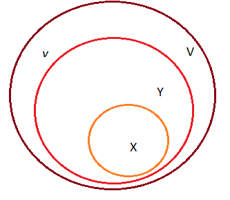

In [1]:
from PIL import Image
im = Image.open("data/X_Y_V_diminishing.png").resize((230, 200))
display(im)

**Primer.**
Dat je skup $V$ reci u tekstu. Neka funkcija $f$ nad skupom računa broj jedinstvenih reči u tekstu. Neka je $X$ izabrani podskup reči iz $V$. Dodavanjem $v$ u $X$, povećanje je $gv$. <br /> 
Opisana funkcija $f$ je submodularna. Zašto? <br />

Dodavanjem $v$ u $X \cup u$ povećanje mora biti manje ili jednako od povećanja dobijenog dodavanjem $v$ u $X$.
Imamo dva slučaja: ili $v$ sadrži neku novu reč koja postoji i u $u$ (a ne postoji u $X$) (tada bi se povećanje smanjilo), ili $v$ ne sadrži novu reč koja bi bila i u $u$, tada povećanje ostaje isto.

## Optimizacija submodularnih funkcija

Submodularna funkcija određuje kvalitet podskupa, koji je, zbog svojstva *iščezavanja* funkcije, obrnuto proporcionalan redunantnosti elemenata. Optimizacijom (tj. maksimizacijom) ove funkcije, bira se podskup neredundanthih elemenata.

Optimizacija submodularnih funkcija je NP-težak problem. Prema tome, za optimizaciju se uglavnom koriste pohlepni (eng. *greedy*) algoritmi. U praksi, pohlepni algoritmi nalaze rešenja koja su veoma blizu optimalnih. [Nemhauser je 1978. dokazao](https://www.cs.toronto.edu/~eidan/papers/submod-max.pdf) da kvalitet podskupa izabranog pohlepnim algoritmom neće biti lošiji od $1−\mathrm{e}^{-1}$  od optimalnog rešenja.

Postoje optimizacije algoritama koje uzimaju u obzir veličinu podataka, kao i koji pruzaju mogućnost da se algoritam izvrši distribuirano na više mašina.

Lista podržanih submodularnih funkcija u paketu Apricot:
1. **Feature-based Functions**
2. **Maximum Coverage**
3. **Facility Location**
4. **Graph Cut**
5. **Sum Redundancy**
6. **Saturated Coverage**
7. **Kombinacija nekih od navedenih funkcija**

Neki od podržanih optimizacionih algoritama u paketu Apricot:
1. **Naive Greedy** - Iterira kroz svaki element originalnog skupa, računa dobit funkcije $f$, a zatim dodaje element u podskup koji najviše doprinosi njegovoj dobiti. Pogodan za paralelizaciju.
2. **Lazy Greedy** - Brža verzija naivnog algoritma. Koristi osobinu iščezavanja funkcije $f$ kako bi preskočio ponovno izračunavanje dobiti elemenata koji manje doprinose kvalitetu podskupa (dobit koju doprinosi svaki element ce se smanjivati dodavanjem elementa u nadskup). Elemente čuva u redu sa prioritetom. Dodavanje elementa u izabrani podskup je u dva koraka: uzima se element sa vrha reda, ponovo se izračunava njegova dobit pa se vraća se u red. Ukoliko je element i dalje na vrhu reda, dodaje se u podskup.
3. **Two-Stage Greedy** - Kombinacija dva optimizaciona algoritma. Defaultno je da je prvi algoritam *naive greedy* a drugi *lazy greedy*.
4. **Stochastic Greedy** - Nadogradnja *lazy greedy* algoritma: da bi se element izabrao u podskup, on ne mora da bude na vrhu reda prilikom ponovnog izračunavanja dobiti, već u nekom procentu blizak elementu na vrhu reda.
5. **Sample Greedy** - Vrši optimizaciju nad podskupom podataka. Izabrani podskup je lošijeg kvaliteta, ali se brzo računa.
6. **GreeDi** - Algoritam koji je dizajniran da se izvršava nad skupom podataka kada on ne može ceo da stane u memoriju. Koristi particionisanje početnog skupa podataka.
7. **Modular Greedy** - Algoritam koji koristi osobinu modularnih funkcija umesto submodularnih (modularne funkcije imaju istu dobit bez obzira na broj elemenata u skupu). Ovaj algoritam je brz, jer je potrebno samo izračunati početnu dobit svakog elementa, sortirati ih, i uzeti $N$ najvećih. Koristi se često na početku optimizacije, a posle se prelazi na neki drugi optimizacioni algoritam.
8. **Bidirectional Greedy** - Pretpostavlja da funkcija $f$ nije monotona (ostali algoritmi pretpostavljaju da je funkcija $f$ monotona).

## API

Korišćenje paketa apricot je jednostavno:<br />
Funkcija submodularne optimizacije se bira inicijalizacijom traženog selektora, a kroz prosleđene parametre se specificiraju detalji: npr. kardinalnost podskupa koji se izdvaja i funkcija optimizacije.
Nad kreiranim selektorom se poziva funkcija *fit* koja izvršava submodularnu optimizaciju, određuje rank elemenata i određuje podskup. Pozivanjem funkcije *transform* izdvaja se trađžni podskup na osnovu sačuvanih rankova. Postoji i funkcija *fit_transform* koja objedinjuje prethodne dve. <br />

Dodatno, funkciji *transform* moze se proslediti *sample_weight* parametar koji specificira težine elemenata ulaznog skupa. Tada se prilikom optimizacije koriste težine (odnosno cena) elemenata umesto uobičajenog ograničenja za kardinalnost elemenata.<br />
Pogledati primer *./examples/04_sample_weight.ipynb*

## Primeri

**Primer 1.** Facility Location <br />
Pogledati ./examples/01_facility_location.ipynb

**Primer 2.** Feature-based functions <br />
Pogledati ./examples/02_feature_based_functions.ipynb

**Primer 3.** Maximum Coverage <br />
Implementacija prethodno opisanog primera korišćenjem *Max Coverage* submodularne funkcije koja računa broj jedinstvenih reči u tekstu. <br />
Pogledati ./examples/03_max_coverage.ipynb

## Korisne informacije o paketu Apricot

Prilikom rada sa velikom količinom podataka, korisno je iskoristiti neke od ugrađenih podrška paketa kako bi se ubrzao proces optimizacije. Apricot ima podršku za rad sa retkim matricama, kao i za rad sa tokom podataka.

### Podrška za retke matrice
Retke matrice (eng. *sparse matrices*) su matrice kod kojih je veliki deo elemenata jednak $0$.
Apricot ima *built-in* podršku za rad sa retkim matricama (u praksi su to često matrice sličnosti) koja dovodi do značajnog ubrzanja.

### Podrška za streaming podataka
Optimizacija nekih submodularnih funkcija moze da se izvrsi nad tokom podataka (eng. *data stream*). To je potrebno ukoliko ceo skup podataka nije moguće istovremeno staviti u memoriju, i/ili ukoliko želimo da elemente obrađujemo jedan po jedan (ili u grupama - eng. *batch*) bez vraćanja na već obrađene elemente. To je korisno kako bi se optimizovao pristup memoriji i samim tim ubrzao proces optimizacije.